# SVM
## Support vectors , reference objects
## Programming Assignment: Опорные объекты

In [1]:
import numpy as np
import pandas
from lib.helpersmd import write_to_file

1- load the sample from the svm-data.csv file. It records a two-dimensional sample (the target variable is indicated in the first column, the features in the second and third).

1- Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).

In [2]:
data=pandas.read_csv('svm-data.csv',header=None)

X=data.loc[:,1:].as_matrix()
y=data.loc[:,0].as_matrix()

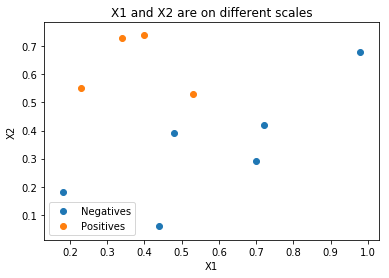

In [3]:
from lib.plotmd import scatterData
import matplotlib.pyplot as plt
classmap={0:"Negatives",1:"Positives"}
scatterData(X,y,classmap)
plt.title("X1 and X2 are on different scales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

2- Train the classifier with a linear kernel, the parameter C = 100000 and random_state = 241. This parameter value should be used to make sure that SVM works with the sample as being linearly separable. At lower values ​​of the parameter, the algorithm will be adjusted taking into account the term in the functional that finishes for small indentations, because of what the result may not coincide with the solution of the classical SVM problem for a linearly separable sample.

2- Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000, random_state=241)
clf.fit(X,y)
# print X[clf.support_]
# print clf.support_vectors_

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

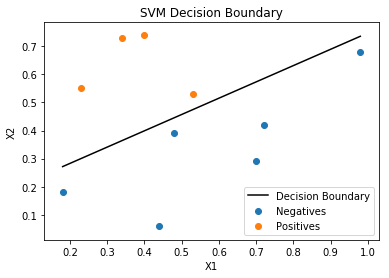

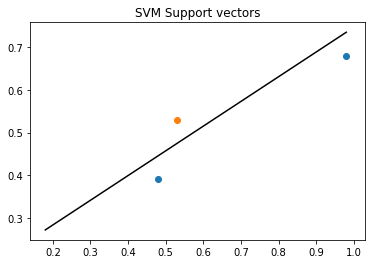

In [12]:
from lib.plotmd import scatterData,plotDecisionBoundary
import matplotlib.pyplot as plt

classmap={0:"Negatives",1:"Positives"}
scatterData(X,y,classmap)

w = clf.coef_[0]
bias= clf.intercept_[0]
fig_boundary={}
fig_boundary["x_min"],fig_boundary["x_max"]= min(X[:,0]),max(X[:,0])
fig_boundary["y_min"],fig_boundary["y_max"]= min(X[:,1]),max(X[:,1])
plotDecisionBoundary(w,bias,fig_boundary)

plt.title("SVM Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

ysv=y[clf.support_]
sv=clf.support_vectors_
classmap={0:"Negatives",1:"Positives"}
scatterData(sv,ysv,classmap)
plotDecisionBoundary(w,bias,fig_boundary)

plt.title("SVM Support vectors")
plt.show()

3- Find the numbers of the objects that are the reference numbers (numbering from the unit). They will be the answer to the assignment. Note that as a response, you need to list the object numbers in ascending order, separated by commas or spaces. Numbering starts from 1.

3- Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [6]:
non0Index=clf.support_+1 
res="{} {} {}".format(non0Index[0],non0Index[1],non0Index[2])
write_to_file(res,"week%d-A%dT%d.out"%(3,1,1))